In [2]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect(os.path.abspath('final.db'))
cur = conn.cursor()

In [3]:
joined_query = "SELECT wp.*, we.index_value, s.ticker FROM WeeklyPrices wp JOIN WeeklyEconomicIndex we ON wp.date = we.date join Stocks s on wp.stock_id = s.id  "
weekly_prices_query = "SELECT * FROM WeeklyPrices"
sentiment_query = "SELECT * FROM SentimentData"
weekly_economic_index = "SELECT * FROM WeeklyEconomicIndex"


In [53]:
joined_df = pd.read_sql(joined_query, conn)
weekly_prices_df = pd.read_sql(weekly_prices_query, conn)
sentiment_df = pd.read_sql(sentiment_query, conn)
joined_df.head(10)


,stock_id,date,open,high,low,close,volume,index_value,ticker
0,1,2024-11-29,141.99,142.050,131.8000,138.25,903463597,1.79,NVDA
1,1,2024-11-22,139.50,152.890,137.1500,141.95,1396925283,3.21,NVDA
2,1,2024-11-15,148.68,149.650,140.0800,141.98,1017459795,1.87,NVDA
3,1,2024-11-08,137.21,149.770,135.5700,147.63,973098624,2.04,NVDA
4,1,2024-11-01,143.00,143.140,132.1106,135.40,987765940,1.65,NVDA
5,1,2024-10-25,138.13,144.420,137.4600,141.54,1154273138,2.11,NVDA
6,1,2024-10-18,136.47,140.890,128.7400,138.00,1357584514,1.71,NVDA
7,1,2024-10-11,124.99,135.780,124.9500,134.80,1290685141,1.94,NVDA
8,1,2024-10-04,118.31,125.040,115.1400,124.92,1272577548,2.22,NVDA
9,1,2024-09-27,116.55,127.665,114.8600,121.40,1419480253,2.07,NVDA


In [ ]:
# filter the five companies
start_date = "2024-07-02"
end_date = "2024-12-07"
filtered_index_joined_df = joined_df[(joined_df['date'] >= start_date) & (joined_df['date'] <= end_date)]
filtered_index_joined_df['percentage_growth_index'] = filtered_index_joined_df['index_value'].pct_change() * 100


nvda_joined_df = joined_df[joined_df['ticker'] == 'NVDA']
nvda_joined_df['percentage_growth_stock'] = round(((nvda_joined_df['close'] - nvda_joined_df['open']) / nvda_joined_df['open']) * 100, 2)
nvda_joined_df['percentage_growth_index'] = nvda_joined_df['index_value'].pct_change() * 100
filtered_nvda_joined_df = nvda_joined_df[(nvda_joined_df['date'] >= start_date) & (nvda_joined_df['date'] <= end_date)]


aapl_joined_df = joined_df[joined_df['ticker'] == 'AAPL']
aapl_joined_df['percentage_growth_stock'] = round(((aapl_joined_df['close'] - aapl_joined_df['open']) / aapl_joined_df['open']) * 100, 2)
aapl_joined_df['percentage_growth_index'] = aapl_joined_df['index_value'].pct_change() * 100
filtered_aapl_joined_df = aapl_joined_df[(aapl_joined_df['date'] >= start_date) & (aapl_joined_df['date'] <= end_date)]

msft_joined_df = joined_df[joined_df['ticker'] == 'MSFT']
msft_joined_df['percentage_growth_stock'] = round(((msft_joined_df['close'] - msft_joined_df['open']) / msft_joined_df['open']) * 100, 2)
msft_joined_df['percentage_growth_index'] = msft_joined_df['index_value'].pct_change() * 100
filtered_msft_joined_df = msft_joined_df[(msft_joined_df['date'] >= start_date) & (msft_joined_df['date'] <= end_date)]

meta_joined_df = joined_df[joined_df['ticker'] == 'META']
meta_joined_df['percentage_growth_stock'] = round(((meta_joined_df['close'] - meta_joined_df['open']) / meta_joined_df['open']) * 100, 2)
meta_joined_df['percentage_growth_index'] = meta_joined_df['index_value'].pct_change() * 100
filtered_meta_joined_df = meta_joined_df[(meta_joined_df['date'] >= start_date) & (meta_joined_df['date'] <= end_date)]

amzn_joined_df = joined_df[joined_df['ticker'] == 'AMZN']
amzn_joined_df['percentage_growth_stock'] = round(((amzn_joined_df['close'] - amzn_joined_df['open']) / amzn_joined_df['open']) * 100, 2)
amzn_joined_df['percentage_growth_index'] = amzn_joined_df['index_value'].pct_change() * 100
filtered_amzn_joined_df = amzn_joined_df[(amzn_joined_df['date'] >= start_date) & (amzn_joined_df['date'] <= end_date)]

/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_60490/2174414084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_index_joined_df['percentage_growth_index'] = filtered_index_joined_df['index_value'].pct_change() * 100
/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_60490/2174414084.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_joined_df['percentage_growth_stock'] = round(((nvda_joined_df['close'] - nvda_joined_df['open']) / nvda_joined_df['open']) * 100, 2)
/var

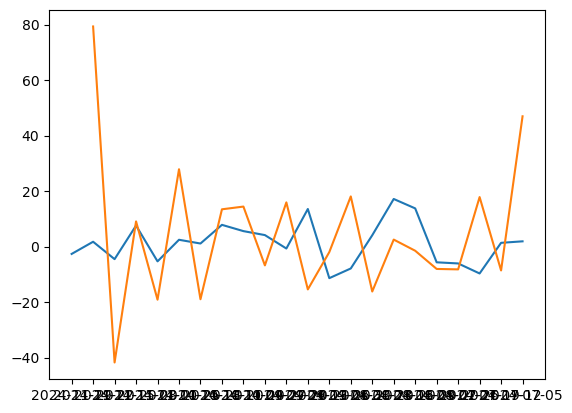

In [66]:
plt.plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_stock'])
plt.plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_index'])

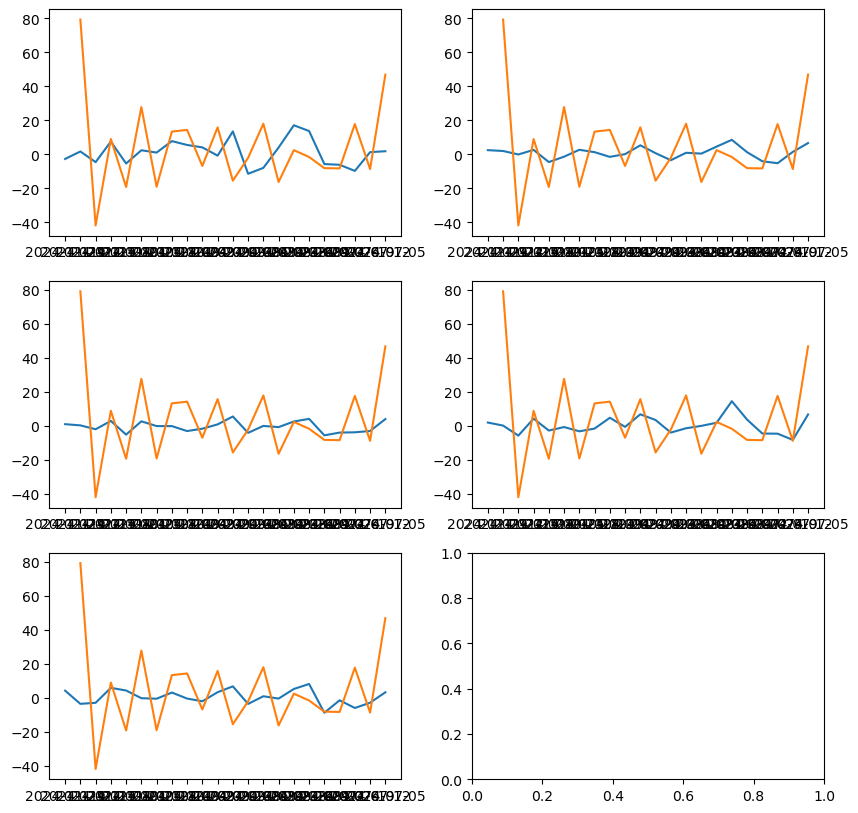

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()
axes[0].plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_stock'])
axes[0].plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_index'])

axes[1].plot(filtered_aapl_joined_df['date'], filtered_aapl_joined_df['percentage_growth_stock'])
axes[1].plot(filtered_aapl_joined_df['date'], filtered_aapl_joined_df['percentage_growth_index'])


axes[2].plot(filtered_msft_joined_df['date'], filtered_msft_joined_df['percentage_growth_stock'])
axes[2].plot(filtered_msft_joined_df['date'], filtered_msft_joined_df['percentage_growth_index'])

axes[3].plot(filtered_meta_joined_df['date'], filtered_meta_joined_df['percentage_growth_stock'])
axes[3].plot(filtered_meta_joined_df['date'], filtered_meta_joined_df['percentage_growth_index'])

axes[4].plot(filtered_amzn_joined_df['date'], filtered_amzn_joined_df['percentage_growth_stock'])
axes[4].plot(filtered_amzn_joined_df['date'], filtered_amzn_joined_df['percentage_growth_index'])



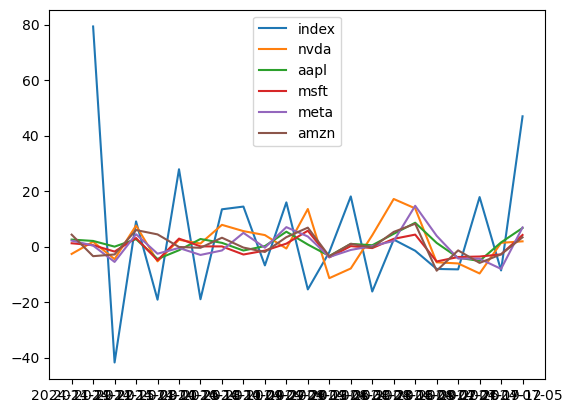

In [ ]:
plt.plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_index'])
plt.plot(filtered_nvda_joined_df['date'], filtered_nvda_joined_df['percentage_growth_stock'])

plt.plot(filtered_aapl_joined_df['date'], filtered_aapl_joined_df['percentage_growth_stock'])


plt.plot(filtered_msft_joined_df['date'], filtered_msft_joined_df['percentage_growth_stock'])


plt.plot(filtered_meta_joined_df['date'], filtered_meta_joined_df['percentage_growth_stock'])


plt.plot(filtered_amzn_joined_df['date'], filtered_amzn_joined_df['percentage_growth_stock'])
plt.legend(['index', 'nvda', 'aapl', 'msft', 'meta', 'amzn'])

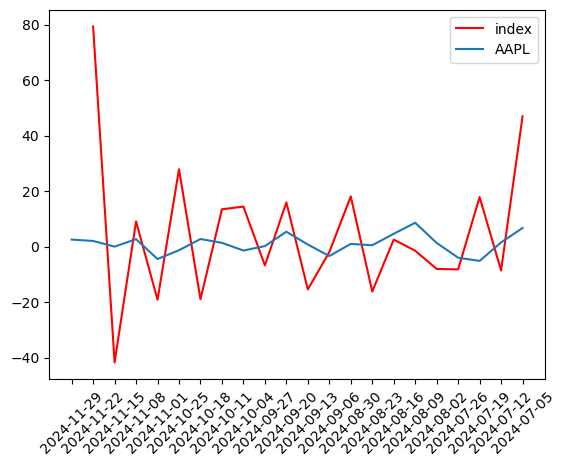

In [10]:
# VISUALIZATION 1
# df dict
df_dict = {'NVDA': filtered_nvda_joined_df, 'AAPL': filtered_aapl_joined_df, 'MSFT': filtered_msft_joined_df, 'META': filtered_meta_joined_df, 'AMZN': filtered_amzn_joined_df}

# company_symbol: NVDA, AAPL, MSFT, AMZN, META
def graph_index_stock(company_symbol):
    if company_symbol in df_dict:
        df = df_dict[company_symbol]
        plt.plot(df['date'], df['percentage_growth_index'], color='red')
        plt.plot(df['date'], df['percentage_growth_stock'])
        plt.legend(['index', company_symbol])
        plt.xticks(rotation=45)
graph_index_stock('AAPL')

In [ ]:
# VISUALIZATION 2




In [ ]:
# VISUALIZTION 3